In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

In [24]:
# Load preprocessed train dataset
train_path = "C:/Users/enock/Downloads/data/train_preprocessed.csv"
train = pd.read_csv(train_path)

In [25]:
# Separate features and target
X = train.drop(columns=['SalePrice'])  # Features (independent variables)
y = train['SalePrice']  # Target (dependent variable)


In [26]:
# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
# Identify numerical columns
numerical_columns = X_train.select_dtypes(include=['int64', 'float64']).columns


In [28]:
# Standardize numerical features
scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_val[numerical_columns] = scaler.transform(X_val[numerical_columns])


In [29]:
# Identify categorical columns and encode them
categorical_columns = X_train.select_dtypes(include=['object']).columns


In [30]:
# Encode categorical columns with pd.factorize
for col in categorical_columns:
    X_train[col], _ = pd.factorize(X_train[col])
    X_val[col] = pd.Categorical(X_val[col], categories=X_train[col].unique()).codes


In [31]:
# Fill NaNs introduced during factorization with -1
X_val = X_val.fillna(-1)


In [32]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}\n")


# ------------------- Hyperparameter Tuning --------------------

In [33]:
# Hyperparameter tuning for Random Forest
print("Tuning Random Forest...")
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

Tuning Random Forest...


In [34]:
rf_model = RandomForestRegressor(random_state=42)
rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=3, scoring='r2', verbose=2)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, min_sam

In [35]:
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [36]:
# Hyperparameter tuning for XGBoost
print("\nTuning XGBoost...")
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


Tuning XGBoost...


In [37]:
xgb_model = XGBRegressor(random_state=42)
xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, cv=3, scoring='r2', verbose=2)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END c

In [38]:
print("Best XGBoost Parameters:", xgb_grid.best_params_)

Best XGBoost Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}


# ----------------------- Model Training -----------------------

In [39]:
# Train best Random Forest model
print("\nTraining Best Random Forest Model...")
best_rf_model.fit(X_train, y_train)
rf_preds = best_rf_model.predict(X_val)


Training Best Random Forest Model...


In [40]:
# Train best XGBoost model
print("Training Best XGBoost Model...")
best_xgb_model.fit(X_train, y_train)
xgb_preds = best_xgb_model.predict(X_val)

Training Best XGBoost Model...


In [41]:
# Evaluate models
evaluate_model(y_val, rf_preds, "Random Forest (Best Model)")
evaluate_model(y_val, xgb_preds, "XGBoost (Best Model)")

Random Forest (Best Model) Performance:
MAE: 23613.44
RMSE: 36329.42
R² Score: 0.83

XGBoost (Best Model) Performance:
MAE: 23062.17
RMSE: 34619.99
R² Score: 0.84



# ----------------------- Ensemble Both Models -----------------------

In [42]:
print("\nEnsembling Random Forest and XGBoost...")
ensemble_preds = (rf_preds + xgb_preds) / 2
evaluate_model(y_val, ensemble_preds, "Ensemble Model")


Ensembling Random Forest and XGBoost...
Ensemble Model Performance:
MAE: 22813.99
RMSE: 35003.92
R² Score: 0.84



# ----------------------- Feature Importance Plot -----------------------

In [43]:
def plot_feature_importance(model, X, title):
    feature_importances = model.feature_importances_
    features = X.columns
    sorted_idx = np.argsort(feature_importances)[::-1]  # Sort by importance
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(features)), feature_importances[sorted_idx], align='center')
    plt.xticks(range(len(features)), [features[i] for i in sorted_idx], rotation=90)
    plt.title(title)
    plt.show()

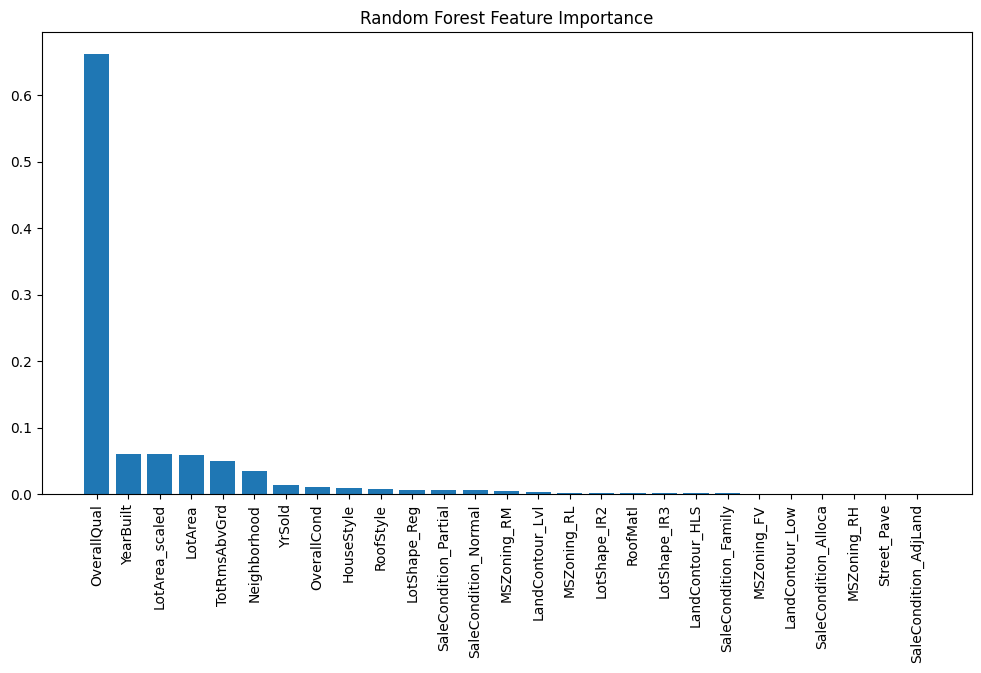

In [44]:
# Plot feature importance for the best Random Forest model
plot_feature_importance(best_rf_model, X_train, "Random Forest Feature Importance")

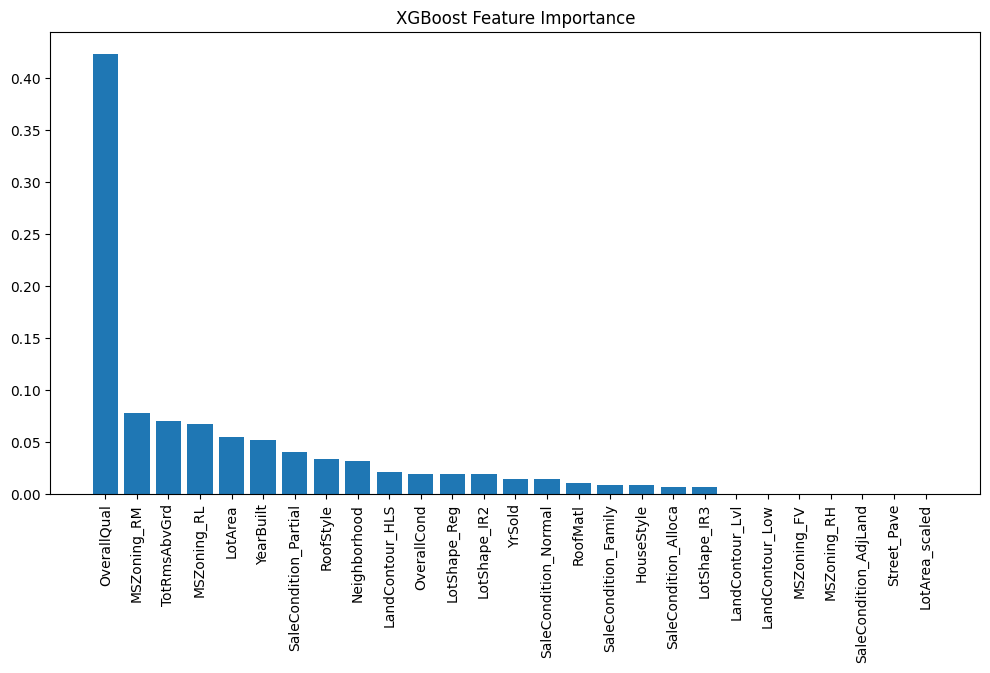

In [45]:
# Plot feature importance for the best XGBoost model
plot_feature_importance(best_xgb_model, X_train, "XGBoost Feature Importance")
